# Encoding

In [2]:
import pandas as pd
df=pd.read_csv("Final Dataset.csv") 
print(df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI Smoker Stroke  \
0             0       0         0        0.0  25.0    Yes     No   
1             0       1         0        1.0  27.0     No     No   
2             0       1         1        1.0  25.0    Yes     No   
3             0       1         1        1.0  25.0    Yes     No   
4             0       0         0        1.0  24.0     No     No   

  HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  \
0                   No             1     0.0  ...              0            1   
1                   No             1     1.0  ...              1            0   
2                   No             1     1.0  ...              1            0   
3                   No             1     0.0  ...              1            0   
4                   No             0     0.0  ...              1            0   

   GenHlth  MentHlth  PhysHlth  DiffWalk     Sex  Age Education  Income  
0        3       0.0       0.0

In [3]:
target_column="Diabetes_012"
non_numeric_columns=[col for col in df.columns if df[col].dtype == 'object' and col != target_column]
print(non_numeric_columns)


['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Sex']


In [4]:
from sklearn.preprocessing import LabelEncoder


label_encoder=LabelEncoder()
for col in non_numeric_columns:
    df[col]=label_encoder.fit_transform(df[col])

print(df.head())


   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0             0       0         0        0.0  25.0       1       0   
1             0       1         0        1.0  27.0       0       0   
2             0       1         1        1.0  25.0       1       0   
3             0       1         1        1.0  25.0       1       0   
4             0       0         0        1.0  24.0       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             1     0.0  ...              0   
1                     0             1     1.0  ...              1   
2                     0             1     1.0  ...              1   
3                     0             1     0.0  ...              1   
4                     0             0     0.0  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            1        3       0.0       0.0         0    0    7          6   
1       

# Missing values detections and its handling

In [5]:
missing_values=df.isnull().sum()
missing_percentage=(missing_values/len(df))*100

# print(len(df))
missing_df=pd.DataFrame({"Missing Values": missing_values,"Percentage": missing_percentage})
missing_df=missing_df[missing_df["Missing Values"]>0]

print(missing_df)


           Missing Values  Percentage
CholCheck               1    0.000788
BMI                     2    0.001577
Fruits                  2    0.001577
MentHlth                2    0.001577
PhysHlth                1    0.000788
Income                  1    0.000788


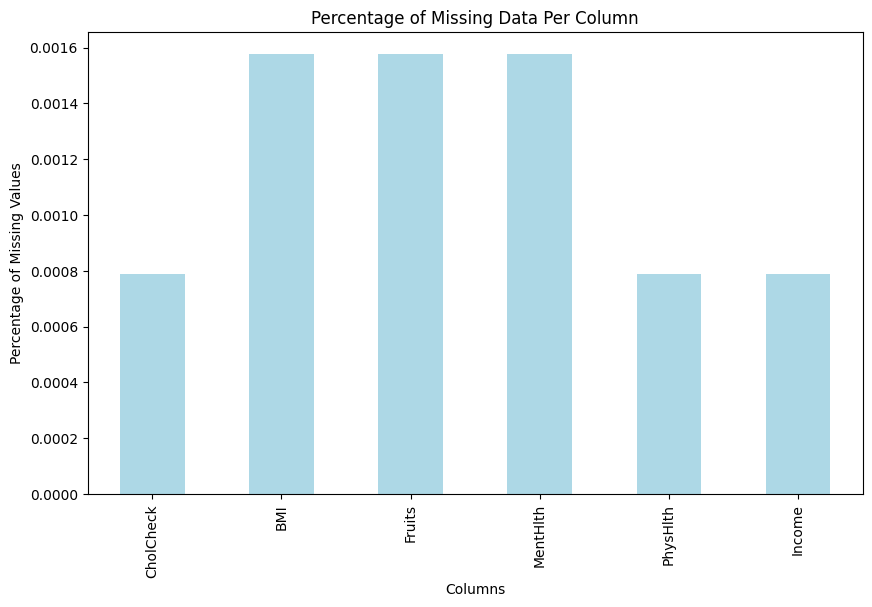

In [6]:
import matplotlib.pyplot as plt

# Plot the percentage of missing values in each column
missing_percentage=df.isnull().mean() * 100
missing_percentage=missing_percentage[missing_percentage > 0]

plt.figure(figsize=(10,6))
missing_percentage.plot(kind='bar', color='lightblue')
plt.title("Percentage of Missing Data Per Column")
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Columns")
plt.show()


In [7]:
print(df.shape[1])

22


In [8]:
numerical_cols=["BMI","MentHlth","PhysHlth","Age","Education","Income","GenHlth"]
for col in numerical_cols:
    df[col]=df[col].fillna(df[col].median())


categorical_cols=["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies", "HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","DiffWalk","Sex"]

for col in categorical_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())  


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [9]:
# print(df)

# Duplicate values and it;s removal

In [10]:
num_duplicate = df.duplicated().sum()
print(f"Number of dupliates: {num_duplicate}")
# print(df[df.duplicated()].head(1))

Number of dupliates: 8581


In [11]:
df = df.drop_duplicates().reset_index(drop=True)

In [12]:
num_duplicate = df.duplicated().sum()
print(f"Number of dupliates: {num_duplicate}")

Number of dupliates: 0


In [13]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,0,0.0,25.0,1,0,0,1,0.0,...,0,1,3,0.0,0.0,0,0,7,6,1.0
1,0,1,0,1.0,27.0,0,0,0,1,1.0,...,1,0,2,0.0,0.0,0,0,11,3,6.0
2,0,1,1,1.0,25.0,1,0,0,1,1.0,...,1,0,2,0.0,2.0,0,1,10,6,8.0
3,0,1,1,1.0,25.0,1,0,0,1,0.0,...,1,0,3,0.0,0.0,1,0,11,4,4.0
4,0,0,0,1.0,24.0,0,0,0,0,0.0,...,1,0,2,0.0,0.0,0,1,8,4,3.0


In [14]:
print(df.shape[0])

118264


# Class imabalance

In [15]:
print(df['Diabetes_012'].value_counts())

Diabetes_012
0    98350
2    17559
1     2355
Name: count, dtype: int64


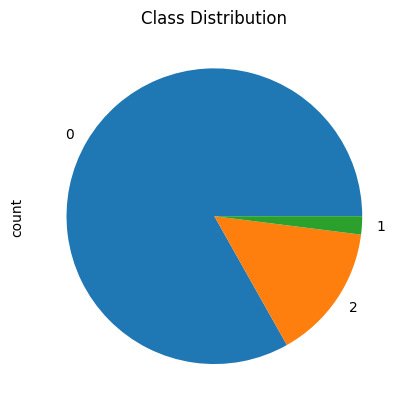

In [16]:
import matplotlib.pyplot as plt

df['Diabetes_012'].value_counts().plot(kind='pie')
plt.title("Class Distribution")
plt.show()


In [17]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

smote=SMOTE(sampling_strategy={1:17559 ,2:17559 },random_state=42)  
X_resampled,y_resampled=smote.fit_resample(X,y)
df_resampled=pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(y_resampled,name='Diabetes_012')],axis=1)

print(df_resampled['Diabetes_012'].value_counts())


Diabetes_012
0    98350
2    17559
1    17559
Name: count, dtype: int64


In [18]:
print(df_resampled.shape)

(133468, 22)


In [19]:
from imblearn.under_sampling import RandomUnderSampler

undersample=RandomUnderSampler(sampling_strategy={0:40000},random_state=42)

X_final,y_final=undersample.fit_resample(X_resampled, y_resampled)
df_resampled=pd.concat([pd.DataFrame(X_final,columns=X.columns),pd.Series(y_final, name='Diabetes_012')], axis=1)
print(df_resampled['Diabetes_012'].value_counts())


Diabetes_012
0    40000
1    17559
2    17559
Name: count, dtype: int64


In [20]:
print(df_resampled.shape)

(75118, 22)


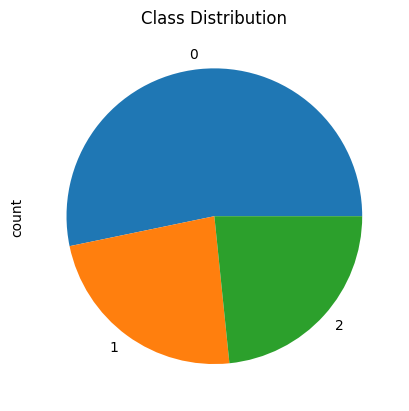

In [21]:
import matplotlib.pyplot as plt

df_resampled['Diabetes_012'].value_counts().plot(kind='pie')
plt.title("Class Distribution")
plt.show()


In [22]:
print(df_resampled)

        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
53794        0         0        1.0  23.0       0       0   
115425       0         0        1.0  33.0       1       0   
90227        1         1        1.0  22.0       1       0   
46633        1         1        1.0  26.0       1       0   
64738        0         0        1.0  27.0       0       0   
...        ...       ...        ...   ...     ...     ...   
118220       1         0        1.0  31.0       0       0   
118225       1         0        1.0  37.0       0       0   
118236       1         0        1.0  37.0       0       0   
118253       0         1        1.0  37.0       0       0   
118263       1         1        1.0  27.0       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
53794                      0             1     1.0        1  ...            0   
115425                     0             1     1.0        1  ...            0   
90227                   

# Outlier detection

In [23]:
import numpy as np

def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=np.number).columns: 
        if col==target_column:
            continue
         
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5* IQR
        upper_bound=Q3+1.5* IQR

        outliers=df[(df[col]<lower_bound) | (df[col]>upper_bound)]
        outlier_counts[col]=len(outliers)

    return outlier_counts

outliers = detect_outliers_iqr(df_resampled)

s=0
for col, count in outliers.items():
    s+=count
    print(f"{col}: {count}")

# print(s)

HighBP: 0
HighChol: 0
CholCheck: 2218
BMI: 1960
Smoker: 0
Stroke: 3221
HeartDiseaseorAttack: 7910
PhysActivity: 0
Fruits: 0
Veggies: 17890
HvyAlcoholConsump: 3262
AnyHealthcare: 4293
NoDocbcCost: 6163
GenHlth: 4377
MentHlth: 11562
PhysHlth: 13158
DiffWalk: 15171
Sex: 0
Age: 0
Education: 0
Income: 0


In [24]:
print(df_resampled.shape)

(75118, 22)


In [25]:
def clip_outliers_iqr(df):
    df_clipped=df.copy()
    for col in df.select_dtypes(include=np.number).columns:
        if col==target_column:
            continue
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1  
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR

        df_clipped[col]=np.clip(df[col],lower_bound,upper_bound)  
    return df_clipped

df_resampled=clip_outliers_iqr(df_resampled)  


In [26]:
print(df_resampled.shape)

(75118, 22)


In [27]:
outliers = detect_outliers_iqr(df_resampled)

s=0
for col, count in outliers.items():
    if col == target_column:
            continue
    s+=count
    print(f"{col}: {count}")

HighBP: 0
HighChol: 0
CholCheck: 0
BMI: 0
Smoker: 0
Stroke: 0
HeartDiseaseorAttack: 0
PhysActivity: 0
Fruits: 0
Veggies: 0
HvyAlcoholConsump: 0
AnyHealthcare: 0
NoDocbcCost: 0
GenHlth: 0
MentHlth: 0
PhysHlth: 0
DiffWalk: 0
Sex: 0
Age: 0
Education: 0
Income: 0


In [28]:
df_resampled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
53794,0,0,1.0,23.0,0,0,0,1,1.0,1,...,0,3.0,0.0,0.0,0,0,9,4,5.0,0
115425,0,0,1.0,33.0,1,0,0,1,1.0,1,...,0,2.0,0.0,0.0,0,0,3,6,8.0,0
90227,1,1,1.0,22.0,1,0,0,1,1.0,1,...,0,2.0,0.0,0.0,0,0,8,4,4.0,0
46633,1,1,1.0,26.0,1,0,0,1,1.0,1,...,0,4.0,5.0,6.0,0,0,9,3,1.0,0
64738,0,0,1.0,27.0,0,0,0,1,1.0,1,...,0,3.0,2.0,0.0,0,0,9,6,7.0,0


# Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = [col for col in df_resampled.select_dtypes(include=['number']).columns if col != target_column]
df_resampled[numerical_cols] = scaler.fit_transform(df_resampled[numerical_cols])
print(df_resampled.head())  


        HighBP  HighChol  CholCheck      BMI  Smoker  Stroke  \
53794      0.0       0.0        0.0  0.31250     0.0     0.0   
115425     0.0       0.0        0.0  0.62500     1.0     0.0   
90227      1.0       1.0        0.0  0.28125     1.0     0.0   
46633      1.0       1.0        0.0  0.40625     1.0     0.0   
64738      0.0       0.0        0.0  0.43750     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
53794                    0.0           1.0     1.0      0.0  ...          0.0   
115425                   0.0           1.0     1.0      0.0  ...          0.0   
90227                    0.0           1.0     1.0      0.0  ...          0.0   
46633                    0.0           1.0     1.0      0.0  ...          0.0   
64738                    0.0           1.0     1.0      0.0  ...          0.0   

         GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  Education  \
53794   0.571429  0.000000      0.00       0.0  0.0 

# Feature selection and extraction

In [30]:
print(df_resampled.isnull().sum())


HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_012            0
dtype: int64


In [31]:
print(df_resampled.columns)  

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_012'],
      dtype='object')


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix=df_resampled.corr()
correlation_with_target = correlation_matrix["Diabetes_012"].sort_values(ascending=True)

print(correlation_with_target)
'''
plt.figure(figsize=(12,8))  
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.xticks(rotation=45, ha="right")  
plt.yticks(rotation=0)
plt.title("Feature Correlation Heatmap")
plt.show()
'''

Income                 -0.181115
Education              -0.148932
PhysActivity           -0.146452
Fruits                 -0.029764
Sex                     0.005650
Smoker                  0.030101
MentHlth                0.052758
PhysHlth                0.180252
HighChol                0.212075
Age                     0.228917
BMI                     0.263043
HighBP                  0.288177
GenHlth                 0.321641
Diabetes_012            1.000000
CholCheck                    NaN
Stroke                       NaN
HeartDiseaseorAttack         NaN
Veggies                      NaN
HvyAlcoholConsump            NaN
AnyHealthcare                NaN
NoDocbcCost                  NaN
DiffWalk                     NaN
Name: Diabetes_012, dtype: float64


'\nplt.figure(figsize=(12,8))  \nsns.heatmap(correlation_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f")\nplt.xticks(rotation=45, ha="right")  \nplt.yticks(rotation=0)\nplt.title("Feature Correlation Heatmap")\nplt.show()\n'

In [33]:
# print(df_resampled[df_resampled.nunique()==1])
drop_cols=df_resampled.nunique()[df_resampled.nunique()==1].index.tolist()

print("cols with Nan values")
print(drop_cols)
# df_resampled[col].unique()[0] 

cols with Nan values
['CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']


In [34]:
df_resampled = df_resampled.drop(columns=drop_cols)
print(df_resampled.shape)

(75118, 14)


In [35]:
df_resampled.head()

,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income,Diabetes_012
53794,0.0,0.0,0.31250,0.0,1.0,1.0,0.571429,0.000000,0.00,0.0,0.666667,0.6,0.571429,0
115425,0.0,0.0,0.62500,1.0,1.0,1.0,0.285714,0.000000,0.00,0.0,0.166667,1.0,1.000000,0
90227,1.0,1.0,0.28125,1.0,1.0,1.0,0.285714,0.000000,0.00,0.0,0.583333,0.6,0.428571,0
46633,1.0,1.0,0.40625,1.0,1.0,1.0,0.857143,0.704781,0.48,0.0,0.666667,0.4,0.000000,0
64738,0.0,0.0,0.43750,0.0,1.0,1.0,0.571429,0.281912,0.00,0.0,0.666667,1.0,0.857143,0


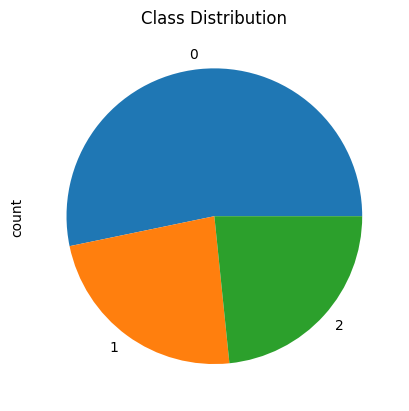

In [36]:
import matplotlib.pyplot as plt


df_resampled['Diabetes_012'].value_counts().plot(kind='pie')
plt.title("Class Distribution")
plt.show()


# Save to csv

In [37]:
df_resampled.to_csv('cleaned.csv')